In [1]:
#importing Libraries
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import exp
from numpy import sin 
from numpy import cos 
import math as m
import warnings
warnings.filterwarnings('ignore')
from math import pi

# 1  
A) Write functions to implement the DFT and IDFT equations.

DTFT-            It works of concept of continous frequency.

DFT-              If we sample the DTFT at some predefined frequnecy. To save computational effort on the Computer system.

DCT-            It is merely used in lossy compression of images and audio signal(mostly images)...so our less memory will be occupied by data,major reason to go for DCT is beacuse of only real datya generation so alos less memory required.



Why can't we use DFT?


As DFT is obtained at some specifc frequency only, so the reconstruction is not  efficinet....

#### A) DFT

In [111]:
def DFT(Xn,N):     #defining the DFT
    Xk_coeff=[]    #to store the result coeff
    for k in range (N):
        p=0
        for i in range(N):
            p=p+Xn[i]*exp((-2j*pi/N)*k*i)
        Xk_coeff.append(p)
    return Xk_coeff

Text(0, 0.5, 'amplitude')

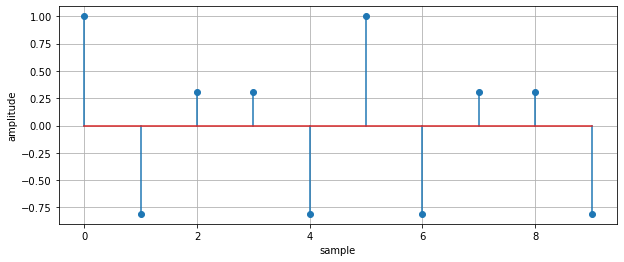

In [112]:
#DFT example
plt.figure(figsize=(10,4))
plt.grid()
n=np.arange(0,10)   # 0 to 9 total= 10
Xn=1*(n==4)
dft=DFT(Xn,10)
plt.stem(dft)
plt.xlabel("sample")
plt.ylabel("amplitude")

## B) 
IDFT

In [113]:
def IDFT(Xk_coeff,N):     #defining the IDFT
    Xn=[]
    for i in range (N):
        p=0
        for k in range(len(Xk_coeff)):
            p=p+Xk_coeff[k]*exp((2j*pi/N)*k*i)
        Xn.append(p)
    return (np.array(Xn)/N)

Text(0, 0.5, 'reconst amplitude')

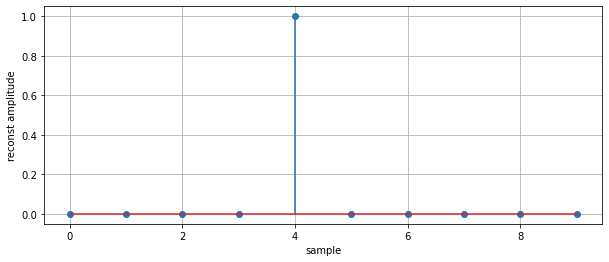

In [115]:
#perfectly reconstructed back original signal
plt.figure(figsize=(10,4))
plt.stem(IDFT(dft,10))
plt.grid()
plt.xlabel("sample")
plt.ylabel("reconst amplitude")

### C)
Write a function to compute the circular convolution of two sequences.
Find the circular convolution of x = [1; 2; 3; 0; 0; 0; 0] and h = [1; 1; 1; 1; 1; 1; 1]
using the function.

In [120]:
n=np.arange(0,10)
x = [1,2, 3, 0, 0, 0, 0]
h= [1,1,1,1,1,1,1]

Text(0, 0.5, 'conv amplitude')

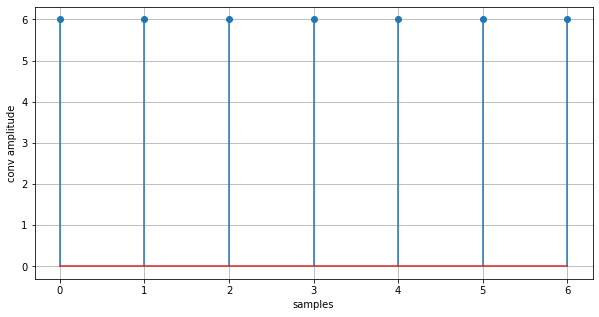

In [121]:
plt.figure(figsize=(10,5))
plt.grid()
Xk=DFT(x,len(x))
Hk=DFT(h,len(h))
cir_conv=IDFT(np.multiply(Xk,Hk),7)
plt.stem(abs(cir_conv))

plt.xlabel("samples")
plt.ylabel("conv amplitude")

### D) 
A signal is given as x(t) = cos2*pi*ft where f = 30 Hz. The signal is sampled
at 100 times per second for 0.91 seconds and then its DFT is computed. Plot
the spectrum versus frequency in Hz. What is the magnitude of DFT at
35 Hz? Is this value non-zero? If so then why?

Text(0, 0.5, 'coeff amplitude')

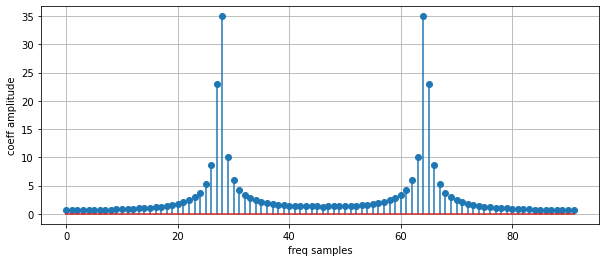

In [122]:
%matplotlib inline
plt.figure(figsize=(10,4))
plt.grid()
Fs=100
Ts=(1/100)
N=91     #no of samples we are liekly to get
n=np.arange(0,(N+1)*Ts,Ts)    #so T being the sampling period, (N+1),upper bound is ignored usually
f=30
Xn=(cos(2*pi*f*n))
F=np.arange(0,Fs,Fs/N)
Xk=DFT(Xn,len(Xn))
plt.stem(np.abs(Xk))

plt.xlabel("freq samples")
plt.ylabel("coeff amplitude")

What is the magnitude of DFT at 35 Hz? Is this value non-zero? If so then why?

In [13]:
print("the DFT coeff at 35Hz frequnecy :",abs(Xk[int(35*91/100)]))

the DFT coeff at 35Hz frequnecy : 4.29558614432306


becasue of not properly sampling we are getting spectral leakage phenomenon, which simply means the approximation of DFT producing some inaccuracy.

## E) 
Consider the two sequences x = [1,-3, 1, 5] and y = [7;-7;-9;-3]. Does
there exist a sequence h such that y is the circular convolution of x and
h. Find h using DFT and IDFT.

In [123]:
y=([7,-7,-9,-3])
x = ([1,-3, 1, 5])

the value of h is : [0.0245098  0.31862745 0.14215686 0.15196078]


Text(0, 0.5, 'circular conv output')

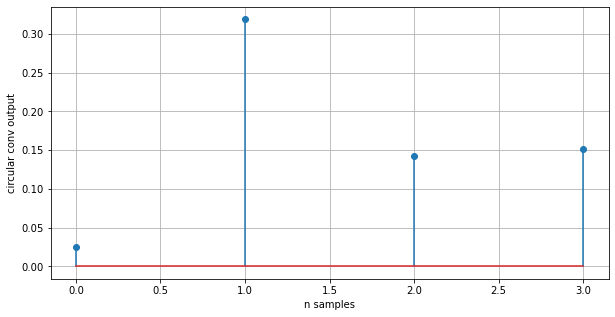

In [125]:
plt.figure(figsize=(10,5))
plt.grid()

h=IDFT((np.divide(DFT(x,4),DFT(y,4))),4)
plt.stem(abs(h))
print("the value of h is :",abs(h))

plt.xlabel("n samples")
plt.ylabel("circular conv output")

 ## F)
Compute the energy of the signal x[n] = (3/4)nu[n] for 0 <= n <= 50. If the
DFT of this signal is X(k) then what is the energy of X(k) and how does
it relate to that of x[n].

Text(0, 0.5, 'magnitude')

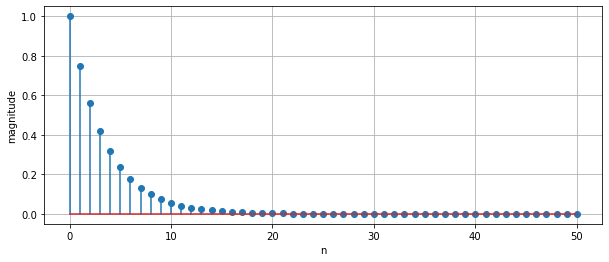

In [128]:
plt.figure(figsize=(10,4))
plt.grid()

n=np.arange(0,51)
Xn=(3/4)**n
plt.stem(Xn)

plt.xlabel("n")
plt.ylabel("magnitude")

In [17]:
def Energy(X):
    energy=np.sum(abs(X)**2)
    return energy

In [18]:
Egy_1=Energy(Xn)
print("Energy of Xn is :",Egy_1)
Xk=np.array(DFT(Xn,51))

Egy_2=Energy(Xk)
print("Energy of Xk is :",Egy_2)


print("AND THE RELATION BETWEEN THESE TWO IS","     ","Egy_1=Egy_2/N")

Energy of Xn is : 2.2857142857138735
Energy of Xk is : 116.57142857140751
AND THE RELATION BETWEEN THESE TWO IS       Egy_1=Egy_2/N


## G)
Is it possible to compute the DTFS coecients of the square wave men-
tioned in Assignment-3 using the function written for DFT as mentioned
above. If yes, then modify the function to compute the DTFS coecients
of the signal and show a labelled plot of the spectrum of these coecients.

In [19]:
pulse=[]
for i in range (2):
    z=[0,0,0,0,0,0,0,0]
    on=[1,1,1,1,1,1,1,1]
    pulse=pulse+on+z

Text(0, 0.5, 'pulse amplitude')

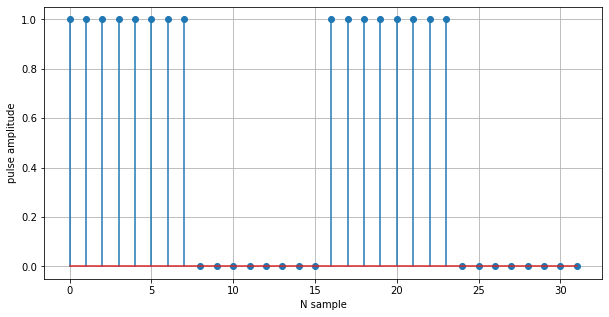

In [131]:
plt.figure(figsize=(10,5))
plt.grid()

plt.stem(pulse)
plt.xlabel("N sample")
plt.ylabel("pulse amplitude")

Text(0, 0.5, 'phase')

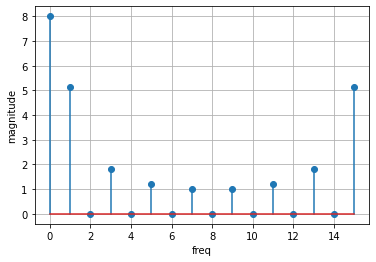

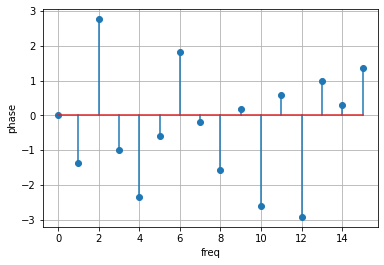

In [135]:
plt.figure()
plt.grid()
plt.stem(abs(np.array(DFT(pulse,16))))
plt.xlabel("freq")
plt.ylabel("magnitude")


plt.figure()
plt.grid()
plt.stem(np.angle(np.array(DFT(pulse,16))))
plt.xlabel("freq")
plt.ylabel("phase")



## Discrete Cosine Transform:
It is used in lossy image compression
because it has very strong energy compaction, i.e., most of the information
is stored in low frequency components of a signal while the other frequency
components have very small information content which can be stored by
using very less number of bits. The general equation for a 1D (N data
items) DCT is dened by the following equation:


### 1) 
Consider a signal x[n] = [8; 16; 24; 32; 40; 48; 56; 64] of length N = 8. Com-
pute the DCT of this signal.

In [136]:
Xn=[8,16,24,32,40,48,56,64]
N=8
C_mat=np.random.rand(8,8)

In [137]:
# producntion of the matrix
def DCT(Xn,N):
    for u in range(N):
        for v in range(N):
            if(u==0):
                C_mat[0][v]=np.sqrt(1/N)
            if(u>=1 and u<8):
                C_mat[u][v]=np.sqrt(2/N)*cos((2*v+1)*u*pi/(2*N))
    dct=np.round(np.dot(C_mat,Xn),4)
    return dct
dct=np.array(DCT(Xn,N))

In [138]:
print("The DCT of the Xn is  :" , dct)

The DCT of the Xn is  : [101.8234 -51.5386  -0.      -5.3876   0.      -1.6072  -0.      -0.4056]


### 2)
Now keep only the first four DCT coefficients
while discarding the rest and then compare its energy with that of x[n].

In [140]:
egy_xn=Energy(np.array(Xn))

In [141]:
en=np.zeros(8)
for i in range (4):
    en[i]=dct[i]
egy_xk=Energy(en)
print("energy of the Xn is :  ",egy_xn)
print("energy of the Xn istaking first foure coeff is :  ",egy_xk)

energy of the Xn is :   13056
energy of the Xn istaking first foure coeff is :   13053.258311280002


In [142]:
energy_content=egy_xk/egy_xn
print("the majority of info lies in low frequency as it has very strong energy compaction which is coming out: ",energy_content)

the majority of info lies in low frequency as it has very strong energy compaction which is coming out:  0.999790005459559


## 3)
Compute the inverse DCT of the sequence obtained and plot it alongside
x[n]

In [143]:
C_imat=np.random.rand(8,8)
def IDCT(Xk,N):
    for u in range(N):
        for v in range(N):
            if(u==0):
                C_imat[0][v]=np.sqrt(1/N)
            if(u>=1 and u<N):
                C_imat[u][v]=np.sqrt(2/N)*cos((2*v+1)*u*pi/(2*N))
    idct=np.dot(np.linalg.inv(C_mat),Xk)
    return idct

the recovered value of Xn is:   [ 8.48604534 15.09915274 24.32539169 32.46926237 39.53075425 47.67462493
 56.90086388 63.51397128]


Text(0.5, 1.0, 'original signal')

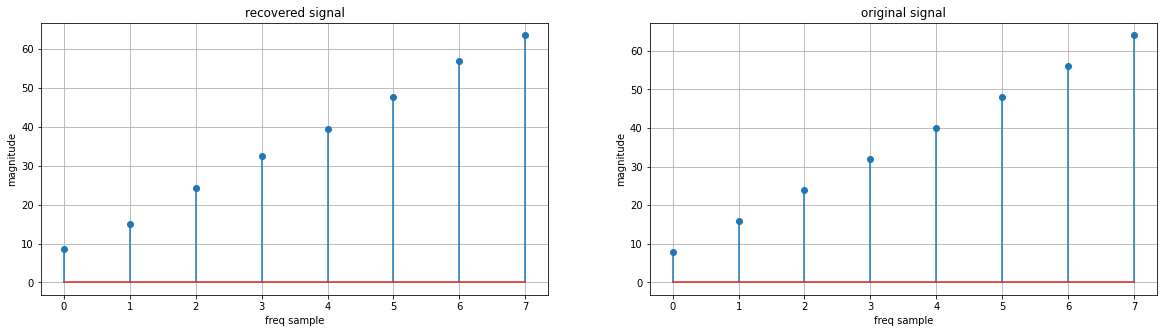

In [146]:
plt.figure(figsize=(20,5))

idct=np.array(IDCT(en,8))
print("the recovered value of Xn is:  ",idct)
plt.subplot(1,2,1)
plt.xlabel("freq sample")
plt.ylabel("magnitude")
plt.title("recovered signal")
plt.stem(idct)
plt.grid()
plt.subplot(1,2,2)
plt.stem(Xn)
plt.grid()
plt.xlabel("freq sample")
plt.ylabel("magnitude")
plt.title("original signal")

Text(0, 0.5, 'error magnitude')

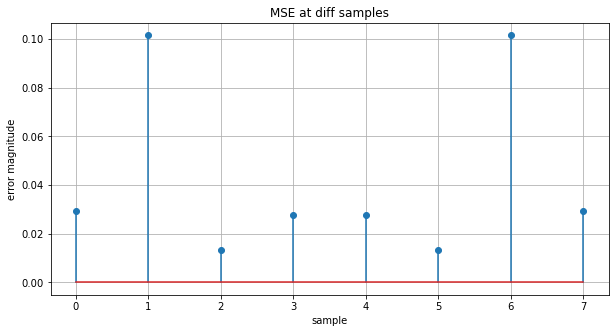

In [150]:
plt.figure(figsize=(10,5))
plt.grid()
MSE1=(Xn-idct)**2/N
plt.stem(MSE1)
plt.title("MSE at diff samples")
plt.xlabel("sample")
plt.ylabel("error magnitude")


In [103]:
MSE1.sum()

0.34346161838696265

## 4)
Now repeat the same process with DFT and compare the mean square
errors. Comment on your observations.

In [151]:
Xn=[8, 16, 24, 32, 40, 48, 56, 64]
N=8

DFT SAMPLE BEING:   [(288+0j), (-32.00000000000002+77.25483399593904j), (-32.000000000000014+31.999999999999986j), (-32+13.254833995939087j), (-32-3.135095805817224e-14j), (-32.00000000000009-13.25483399593913j), (-32.00000000000014-32.00000000000004j), (-31.99999999999978-77.25483399593895j)]


Text(0, 0.5, 'magnitude')

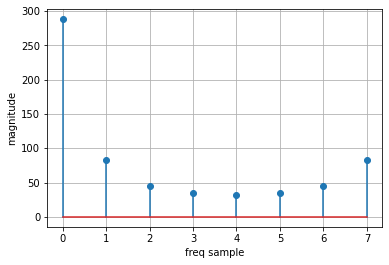

In [169]:
dft=DFT(np.array(Xn),8)
print("DFT SAMPLE BEING:  " ,dft)
plt.stem(abs(np.abs(dft)))
plt.grid()
plt.xlabel("freq sample")
plt.ylabel("magnitude")

In [170]:
print("energy of Xn is ",Energy(np.array(Xn)))
print("energy of Xn's DFT is ",Energy(np.array(dft)))
print("Relation:    ENERGY (X(N))=ENERGY(X(K))/N")

energy of Xn is  13056
energy of Xn's DFT is  104447.99999999999
Relation:    ENERGY (X(N))=ENERGY(X(K))/N


In [171]:
t=(np.array([dft[0],dft[1],dft[2],dft[3],0,0,0,0]))   #making a seprate array after makingthe last 4 elements zeros

the sample of reconstructed signal after 4 ignoring sample are [28.46945149 24.33105012 32.24903099 32.82514786 40.66313234 40.19950248
 48.16637832 50.383625  ]


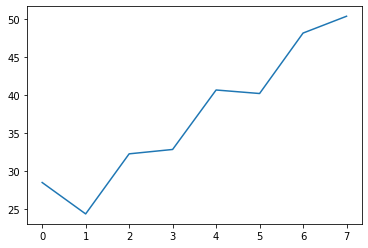

In [174]:
recons_sig=np.array((IDFT(t,8)))
print("the sample of reconstructed signal after 4 ignoring sample are",abs(recons_sig ))
plt.plot(abs(recons_sig))

In [161]:
MSE=np.sum(((abs(np.array(Xn)-recons_sig))**2))/N

In [162]:
print("the MSE after taking ony 4 sample from DFT is :", MSE)

the MSE after taking ony 4 sample from DFT is : 175.99999999999994


#### Comment on your observations.

ERROR associated with the DFT is way more than that of DCT, while we see the space consume by DCT is very less coz we neglected hight=er freqnecy coeff and we still had more than (99.9%of the information)